# ML-1 Korelasi dan Regresi

Sebelum mulai:
*   Student yang pakai Colab, silahkan "Save a Copy in Drive" dahulu
*   Student yang pakai Jupyter Notebook, silahkan download code ini dahulu



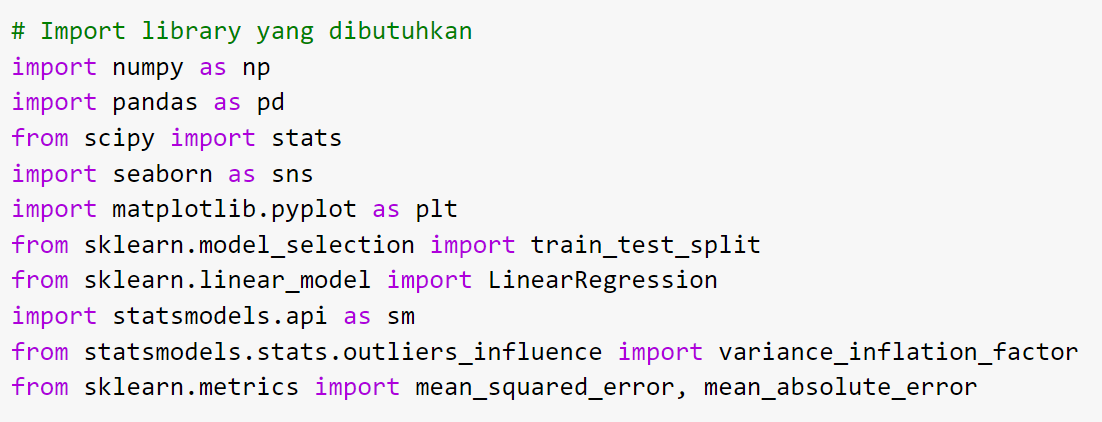

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Uji Asumsi Klasik pada Regresi Linier
Regresi Linier memiliki 5 asumsi yang perlu dipenuhi. Asumsi ini sebenarnya wajib dalam teori ilmu statistika, namun dalam praktik machine learning proses ini terkadang diabaikan karena ketidaktahuan. Uji ini berfungsi untuk ketepatan estimasi dan menjauhkan dari bias

1. Hubungan (korelasi) linier antara feature dan label
2. Uji Normalitas
3. Tidak terjadi Heteroskedastisitas
4. Tidak terdapat autokorelasi
5. Tidak terdapat multikolinearitas (**untuk regresi berganda**)

**Sumber**: buku *Multivariate data analysis* oleh Hair


In [ ]:
! wget -O 50_Startups.csv https://www.dropbox.com/s/z2ue4a1ogefcuo3/50_Startups.csv?dl=0

--2022-09-19 08:42:07--  https://www.dropbox.com/s/z2ue4a1ogefcuo3/50_Startups.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/z2ue4a1ogefcuo3/50_Startups.csv [following]
--2022-09-19 08:42:08--  https://www.dropbox.com/s/raw/z2ue4a1ogefcuo3/50_Startups.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc94633c20badf842bcab699b105.dl.dropboxusercontent.com/cd/0/inline/BtNKhT-__i1EGW1oj8lSfT2vWO9VZ2EBxvNBNv0ftTcwPhMjjJ5qbI4I7-EuOdaQEWNVIAmy4hSGJEhLhQtYSTRKNb8OZ9l8Qa5my4NwEUWHpQmBDJTeiERwgvkRzVaJHXa0ArtPbHEwnprLxUnNa_ApM_3zWRDsWPuvbyJ1cg9gwA/file# [following]
--2022-09-19 08:42:08--  https://uc94633c20badf842bcab699b105.dl.dropboxusercontent.com/cd/0/inline/BtNKhT-__i1EGW1oj8lSfT2vWO9VZ2EBxvNBNv0ftTcwPhMjjJ5qbI4I7-EuOdaQEW

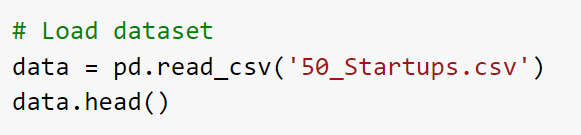

In [ ]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


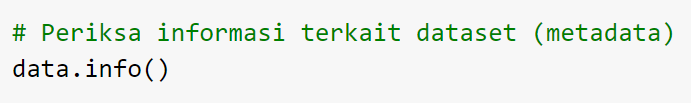

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## 1. Hubungan Linier antara tiap feature dengan label (X dan Y)

Pertama kita akan menentukan mana variable independen (X) dan dependen (Y).

Pada aktivitas ini, kita akan menggunakan kolom **R&D Spend**, **Administration**, dan **Marketing Spend** sebagai variable independen/feature.

Sisanya, kolom **Profit**, akan kita gunakan sebagai variable dependen (Y).

Selanjutnya, kita perlu melihat hubungan linear tiap X dengan Y.

Hubungan linier bisa dilihat menggunakan analisis korelasi atau plot.

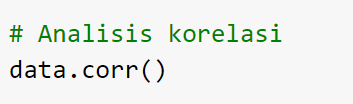

In [ ]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


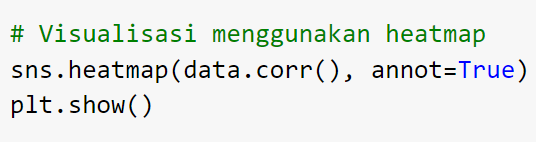

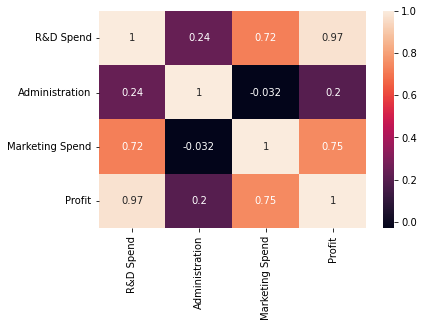

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Dari analisis korelasi terlihat variable yang punya hubungan linier cukup kuat dengan profit adalah
- Marketing Spend dan
- R&D Spend

Mari lihat hasil scatter plot tiap kolom untuk lebih meyakinkan!

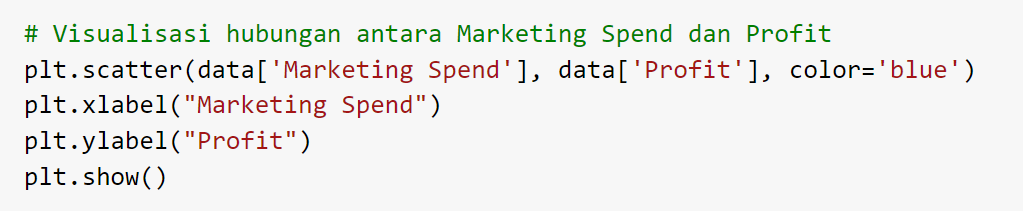

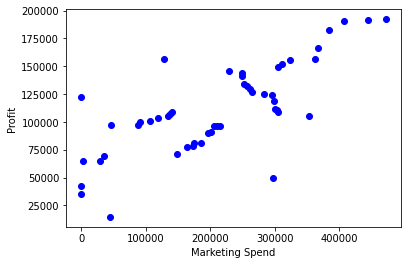

In [ ]:
plt.scatter(data['Marketing Spend'], data['Profit'], color='blue')
plt.xlabel("Marketing Spend")
plt.ylabel('Profit')
plt.show()

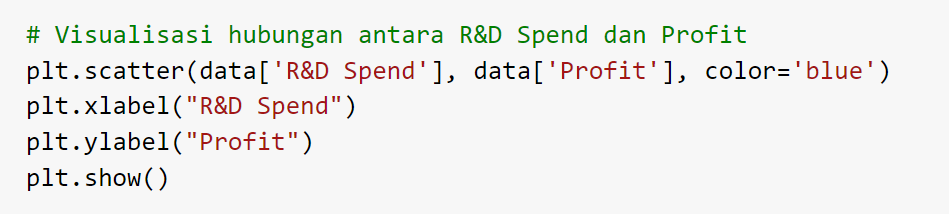

<function matplotlib.pyplot.show(*args, **kw)>

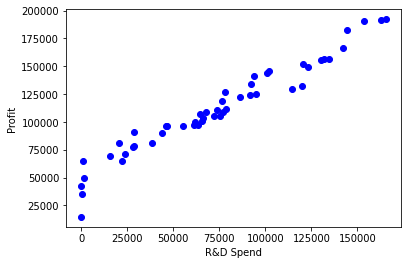

In [ ]:
plt.scatter(data['R&D Spend'], data['Profit'], color='blue')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show

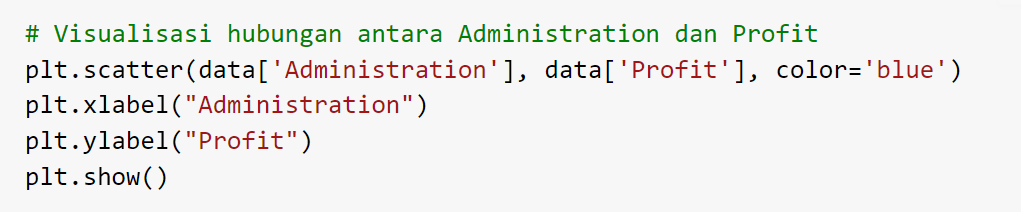

<function matplotlib.pyplot.show(*args, **kw)>

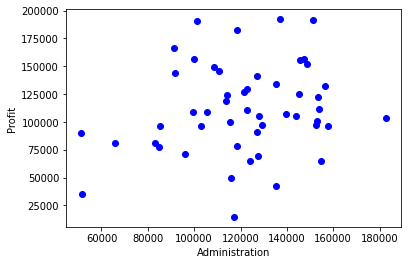

In [ ]:
plt.scatter(data['Administration'], data['Profit'], color='blue')
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show

Terlihat bahwa R&D dan marketing spend plotnya masih cenderung membentuk garis yang menunjukkan masing-masing memiliki hubungan yang kuat dengan profit.

Sementara, administration plotnya terlihat berpencar sehingga tidak ada hubungan linier dengan profit.

Jadi kedepannya variabel independen yang kita gunakan sebagai feature adalah **Marketing Spend** dan **R&D Spend**.

## Splitting Data Menjadi Data Train dan Test

Berikut adalah programnya:

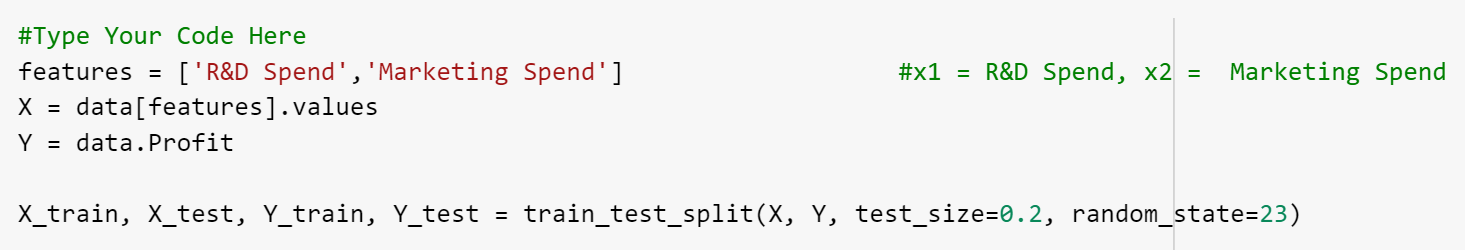

In [ ]:
features = ['R&D Spend', 'Marketing Spend']
X = data[features].values
Y = data.Profit

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23 )

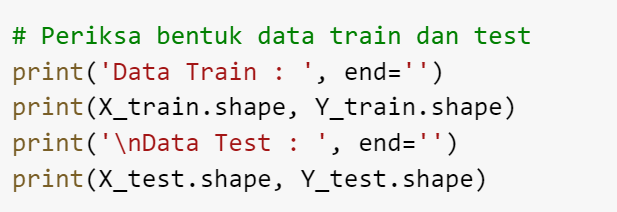

In [ ]:
print('Data Train : ', end='')
print(X_train.shape, Y_train.shape)
print('\nData Test : ', end='')
print(X_test.shape, Y_test.shape)

Data Train : (40, 2) (40,)

Data Test : (10, 2) (10,)


## Modeling

Membuat model Regresi Linier (Linier Regression) kemudian melatihnya menggunakan data train.

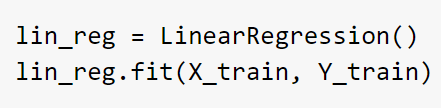

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

## 2. Uji normalitas
Disini yang kita uji adalah normalitas residual (errornya).


Mengapa? karena menurut sifat distribusi normal, kalau errornya normal dan modelnya linier maka koefisien regresinya juga berdistribusi normal (terhindar dari bias outlier).


Berikut adalah programnya:

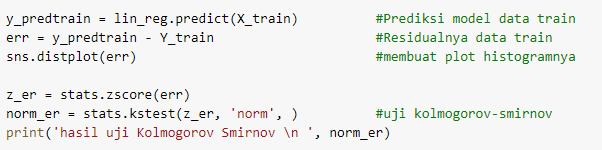

hail uji Kolmogrov Smirnov 
  KstestResult(statistic=0.12495970531173806, pvalue=0.5196300084946925)


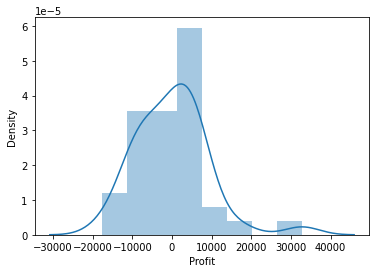

In [ ]:
y_predtrain = lin_reg.predict(X_train)
err = y_predtrain - Y_train
sns.distplot(err)

z_er = stats.zscore(err)
norm_er = stats.kstest(z_er, 'norm')
print('hail uji Kolmogrov Smirnov \n ', norm_er)

Ho : data = berdistribusi normal

Ha : data tidak berdistribusi normal

Karena pvalue > 0.05, maka Ho diterima.

Plot histogram yang membentuk lonceng dan puncaknya cenderung ke tengah juga mendukung bahwa **errornya sudah berdistribusi normal**.

## 3. Tidak terjadi Heteroskedastisitas

Homoskedastisitas  adalah  kondisi ketika  nilai  residu/error  pada  tiap  nilai  prediksi  bervariasi  dan  variasinya  cenderung konstan.


Lawan dari homoskedastisitas adalah heteroskedastisitas, dimana error cenderung berubah dan malah berkorelasi dengan prediksinya. Jika ini terjadi tentu menunjukkan bahwa prediksi ini memiliki suatu bias tertentu.

Untuk mengecek hal ini kita bisa lihat dari scatter plot error-nya.

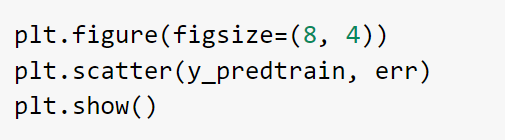

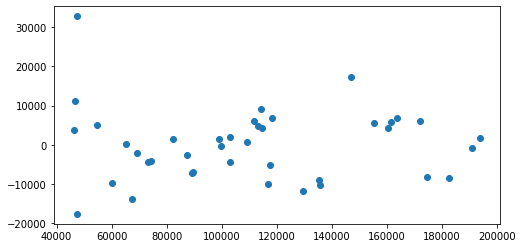

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(y_predtrain, err)
plt.show()

Terlihat plot error-nya berada di sekitar angka yang sama meski nilai prediksinya bertambah.

Artinya nilai prediksi kita tidak terganggu oleh errornya atau **tidak terjadi heteroskedastisitas**.

Berikut adalah contoh plot jika terjadi heteroskedastisitas, plotnya membentuk pola tertentu yang menunjukkan bahwa nilai prediksinya masih berkorelasi dengan error sehingga nilai prediksi kita masih terganggu oleh nilai errornya:

![alt text](https://drive.google.com/uc?id=1VX4X3w95lBlTphDXg9Ez2Rv9Ky3tUz8e)

Cara lain untuk menguji homoskedastisitas: using Glejser Test, White test, Breusch-Pagan test

## 4. Tidak terjadi Multikolinearitas (khusus regresi berganda)
Multokolinearitas maksudnya adalah hubungan yang kuat antar feature.

Regresi linier mengasumsikan bahwa feature-featurenya tidak saling berhubungan. Tentu saja ini hanya berlaku untuk regresi linier berganda (yang featurenya lebih dari 1).

Salah 1 cara mengujinya adalah dengan melihat nilai VIF.

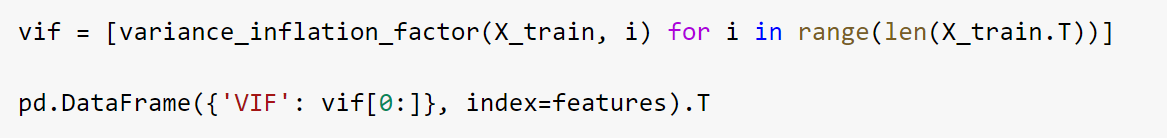

In [ ]:
vif = [variance_inflation_factor(X_train, i) for i in range(len(X_train.T))]

pd.DataFrame({'VIF' : vif[0:]},  index=features).T

,R&D Spend,Marketing Spend
VIF,6.637335,6.637335


Some papers argue that a VIF<10 is acceptable, but others says that the limit value is 5.
- "10" as the maximum level of VIF (Hair et al., 1995)
- "5" as the maximum level of VIF (Ringle et al., 2015)


Berdasarkan kriteria Hair, **tidak terjadi kolinearitas**.

> **Catatan:** Namun, berdasarkan kriteria Ringle masih terjadi kolinearitas. Disini kita menggunakan teori Hair.

## 5. Tidak terjadi Autokorelasi
Autokorelasi adalah hubungan yang erat antar entry, misalnya antara data ke 4 dengan ke 5, data ke-6 dengan ke-7, dll.

Autokorelasi juga harus dihindari dalam regresi linier. Uji ini tersedia di library yang lain, sehingga kita perlu training model lagi menggunakan library itu.

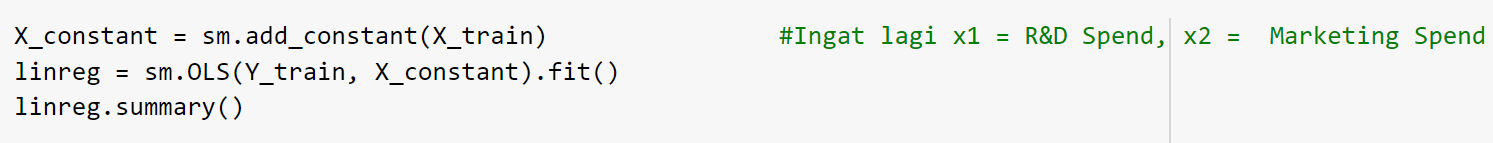

In [ ]:
X_constant = sm.add_constant(X_train)
linreg = sm.OLS(Y_train, X_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     408.7
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           5.97e-26
Time:                        09:04:54   Log-Likelihood:                -421.18
No. Observations:                  40   AIC:                             848.4
Df Residuals:                      37   BIC:                             853.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.639e+04   2887.411     16.068      0.000    4.05e+04    5.22e+04
x1             0.8251      0.045     18.249      0.000       0.733       0.917
x2             0.0236      0.017      1.378      0.176      -0.011       0.058
==============================================================================
Omnibus:                       13.108   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.774
Skew:                          -0.964   Prob(JB):                     0.000228
Kurtosis:                       5.520   Cond. No.                     4.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Uji Autokorelasi bisa kita lakukan menggunakan nilai Durbin-Watson (dw).

Bandingkan nilai dw di atas dengan gambar di bawah!

![alt text](https://drive.google.com/uc?id=1iz2TAjhoquwj6nztVU9poi79-8-Bkda_)


Sebelum membandingan nilai dw dengan gambar di atas, kita perlu mengetahui nilai dL dan du terlebih dahulu.

Nilai **dL** (lower bound) dan **du** (upper bound) bisa diketahui menggunakan DW table. Download DW table [di sini](https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf).


Diketahui:
- n = 50 (jumlah data)
- k = 2 (jumlah independen variable)
- dw = 2.147

Maka:
- du = 1.628
- dL = 1.462

Terakhir, bandingkan nilai dw dengan gambar di atas.

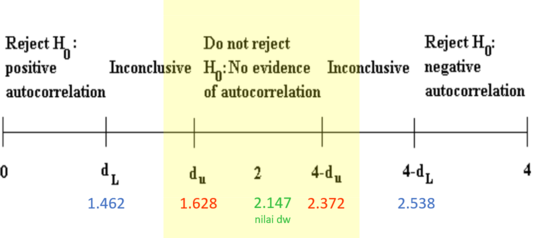

Karena nilai dw (2.147) berada diantara nilai du (1.628) dan 4-du (2.372), maka **tidak ada masalah autokorelasi**.

### Catatan: Cara mengetahui nilai dL dan du menggunakan Table DW

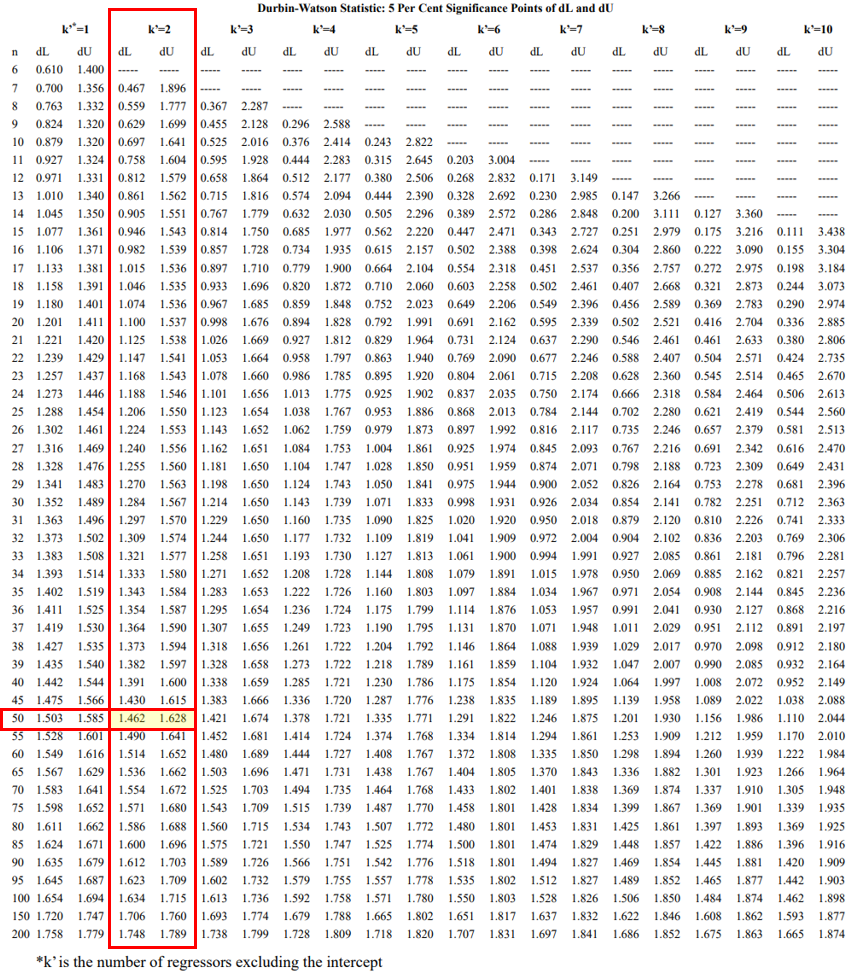

# Mengevaluasi hasil regresi linier

Kita akan mengevaluasi model menggunakan metrics **MSE**, **RMSE**, dan **MAE**

Berikut adalah programnya:     

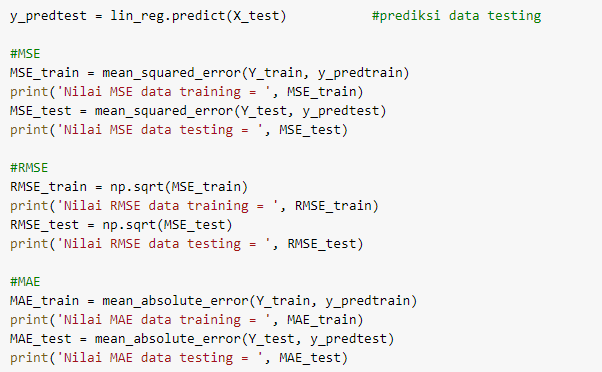

In [ ]:
y_predtest = lin_reg.predict(X_test)

# MSE
MSE_train = mean_squared_error(Y_train, y_predtrain)
print('Nilai MSE data training = ', MSE_train)
MSE_test = mean_squared_error(Y_test, y_predtest)
print('Nilai MSE data testing = ', MSE_test)

# RMSE
RMSE_train = np.sqrt(MSE_train)
print('Nilai RMSE data training =', RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print('Nilai RMSE data testing = ', RMSE_test)

# MAE
MAE_train = mean_absolute_error(Y_train, y_predtrain)
print('Nilai MAE data training =', MAE_train)
MAE_test = mean_absolute_error(Y_test, y_predtest)
print('Nilai MAE data testing =', MAE_test)

Nilai MSE data training =  81897487.02005282
Nilai MSE data testing =  71176114.65887138
Nilai RMSE data training = 9049.72303554384
Nilai RMSE data testing =  8436.593782971382
Nilai MAE data training = 6843.0077696397175
Nilai MAE data testing = 5771.48200353918


> Catatan: Untuk mengetahui apakah nilai ini cukup bagus atau tidak, kita perlu membuat model regresi lain lalu membandingkan MSE, RMSE, dan MAE-nya.

> Model terbaik adalah yang nilai MSE, RMSE, dan MAE-nya paling kecil

## Visualisasi Hasil Prediksi

Kita akan memvisualisasikan hasil prediksi dengan data sebenarnya (data testing).

Berikut ini adalah programnya:

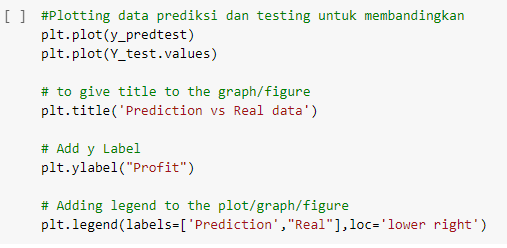

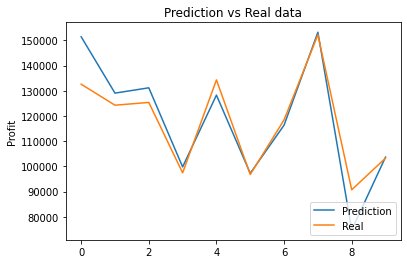

In [ ]:
# Tulis code di sini
plt.plot(y_predtest)
plt.plot(Y_test.values)

plt.title('Prediction vs Real data')

plt.ylabel("Profit")

plt.legend(labels=['Prediction', "Real"], loc='lower right')

Terlihat bahwa nilai prediksi dan data testing cukup dekat.

## Koefisien Determinasi (R2)

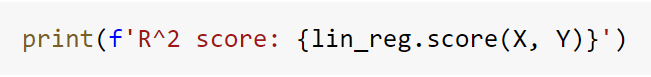

In [ ]:
print(f'R^2 score: {lin_reg.score(X,Y)}')

R^2 score: 0.9499067945573266


Terlihat nilai R2 = 0.9499, ini merupakan nilai yang sangat bagus.

Nilai ini menunjukkan 94.99% dari profit dapat diprediksi oleh R&D spend dan Marketing Spend.

Sisanya (5.01%) dipengaruhi faktor lain yang tidak ada di model ini.

## Uji Simultan, Parsial, dan Besar Pengaruh Feature

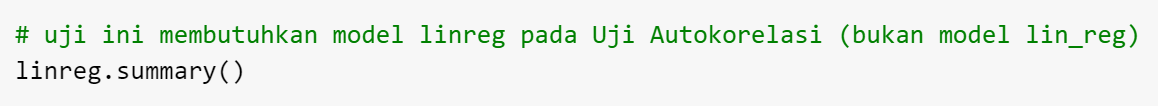

In [ ]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     408.7
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           5.97e-26
Time:                        09:10:51   Log-Likelihood:                -421.18
No. Observations:                  40   AIC:                             848.4
Df Residuals:                      37   BIC:                             853.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.639e+04   2887.411     16.068      0.000    4.05e+04    5.22e+04
x1             0.8251      0.045     18.249      0.000       0.733       0.917
x2             0.0236      0.017      1.378      0.176      -0.011       0.058
==============================================================================
Omnibus:                       13.108   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.774
Skew:                          -0.964   Prob(JB):                     0.000228
Kurtosis:                       5.520   Cond. No.                     4.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.   Uji Simultan
> Terlihat nilai p-value uji-F (**Prob (F-statistic)**) adalah	5.97 x 10^-26 < 0.05, artinya secara bersama-sama R&D Spend dan Marketing Spend berpengaruh signifikan terhadap Profit.




2.   Uji Parsial
> Terlihat nilai p-value uji-T (**P>|t|**) untuk R&D adalah 0.000 < 0.05 dan untuk Marketing 0.176, artinya secara sendiri-sendiri R&D Spend memberi pengaruh yang signifikan terhadap Profit, sementara pengaruh dari Marketing Spend tidak signifikan.




3. Besar pengaruh feature
> Perhatikan kolom "**coef**", pada x1 (R&D Spend) nilainya 0.8251, artinya setiap  perusahaan menaikkan kinerja R&D Spend 1 level saja mampu meningkatkan Profit perusahaan sebesar 0.8251.
Sementara koefisien x2 (marketing) sebesar 0.0236. Artinya, selama ini pengaruh Marketing Spend terhadap Profit hanya 0.0236.


# Kesimpulan

Karena model yang kita buat telah **memenuhi Uji Asumsi Klasik**, maka model tersebut sudah bisa kita pakai untuk memprediksi data baru.

Model ini juga sudah bisa kita deploy. Materi deployment akan disampaikan saat AI Domain.

In [ ]:
# Input data baru
RnD_Spend = float(input('Input R&D Spend \t= '))
Marketing_Spend = float(input('Input Marketing Spend\t= '))
data_baru = [[RnD_Spend, Marketing_Spend]]

# Prediksi data baru menggunakan model Regresi Linear
hasil_prediksi = lin_reg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

# Cetak hasil prediksi (Profit)
print('\nPrediksi Profit yang akan didapat adalah', hasil_prediksi)

Input R&D Spend 	= 122
Input Marketing Spend	= 10

Prediksi Profit yang akan didapat adalah 46494.78120968716


# Self-Learning ML-1: FGD

Download dataset [di sini](https://drive.google.com/file/d/1OjcfLYS5NI2eVHJppg_BGd-fcN5Jj4fo/view?usp=sharing).

1. Buat model Regresi Linear dari tersebut
2. Lakukan Uji Asumsi Klasik pada model
3. Simpulkan hasil Uji Asumsi Klasik
4. Kumpulkan SL ke HC!